# StrokeSense: Analyzing Medical Data for Stroke Detection


![](https://media.istockphoto.com/id/1369757487/photo/brain-stroke.jpg?s=612x612&w=0&k=20&c=kwNHhaC1CjP28l3dNXSt_lLObR202gvBqUkSAhThje0=)


According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

According to the National Institute on Aging "A stroke happens when there's a change in how blood flows through the brain. Blood brings oxygen and nutrients to brain cells. If blood can't flow to a part of the brain, cells that do not receive enough oxygen suffer and eventually die."

There are two main causes of stroke: a blocked artery (ischemic stroke) or leaking or bursting of a blood vessel (hemorrhagic stroke). Some people may have only a temporary disruption of blood flow to the brain, known as a transient ischemic attack (TIA), that doesn't cause lasting symptoms.

Factors that can lead to strokes are:
* Being overweight or obese
* Physical inactivity
* Use of illegal drugs such as cocaine and methamphetamine
* High blood pressure
* Cigarette smoking or secondhand smoke exposure
* High cholesterol
* Diabetes
* Cardiovascular disease, including heart failure, heart defects, heart infection or irregular heart rhythm

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
The medical data of various patients is analysed and the likelihood of occurence of stroke in these patients is studied.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install jovian

##Dataset

The Dataset we are using is "healthcare-dataset-stroke-data.csv" obtained from kaggle.com. It can be found at https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset.

This dataset consists of various information regarding the patients and their medical status

Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

We use read_csv() function of pandas to read the dataset

In [ ]:
df= pd.read_csv("healthcare-dataset-stroke-data.csv")

## Data Preparation and Cleaning

After we read the csv file using pandas 'read_csv' function, Then number of rows and columns is determined using the shape() function.

Describe() gives information about the columns such as the mean std deviation,maximum value etc

Then we drop those columns that contain null values using dropna()

then duplicate columns are dropped using drop_duplicates()

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Here we see there are 201 null values in bmi column so we drop these columns using the dropna function.

In [ ]:
df = df.dropna()

In [ ]:
df=df.sort_values(by='id')
df.drop_duplicates()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2333,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
1010,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
2528,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
805,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
419,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
5083,72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0
2629,72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0
121,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1


## Exploratory Analysis and Visualization

Here we plot some interesting graphs to observe the relationship between various columns



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

1.  Let's plot a pie chart to find out about the proportion of males and females in our dataset

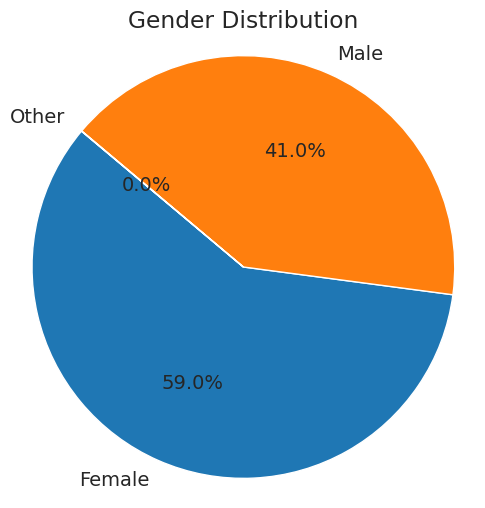

In [ ]:
# Count the number of occurrences for each gender
gender_counts = df['gender'].value_counts()

# Create the pie chart using matplotlib
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

2. Let's Plot a Histogram to see the number of patients with heart disease in our dataset

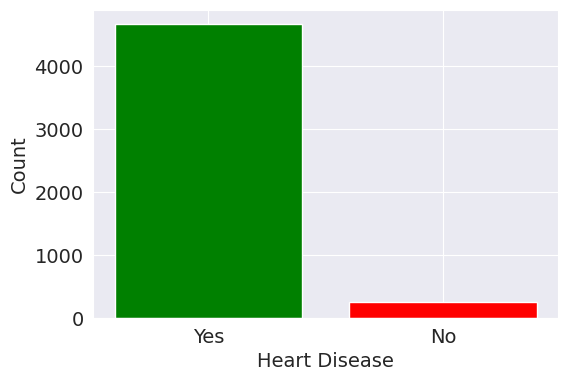

In [ ]:

hd_counts = df['heart_disease'].value_counts()
hd_labels = ['Yes','No']

# Create the bar chart using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(hd_labels, hd_counts.values, color=['green', 'red'])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(hd_labels)


plt.show()

3. Here we plot the donut chart of the smoking status of the patients giving the count for each status

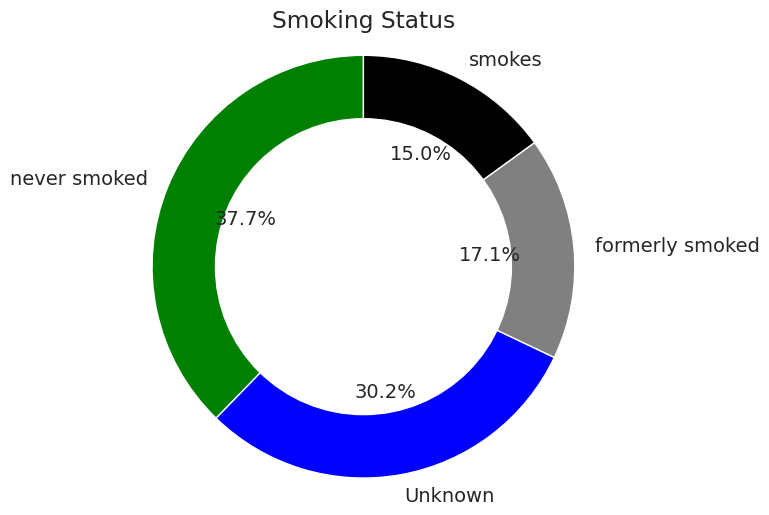

In [ ]:
smoke_counts = df['smoking_status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(smoke_counts.values, labels=smoke_counts.index, colors=['green', 'blue', 'grey', 'black'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title('Smoking Status')
plt.show()

4. Let's plot a graph to observe the relationship between bmi and gender of the patients.
To do this we group the data by the gender and find the mean value of bmi for each gender and then plot a point plot

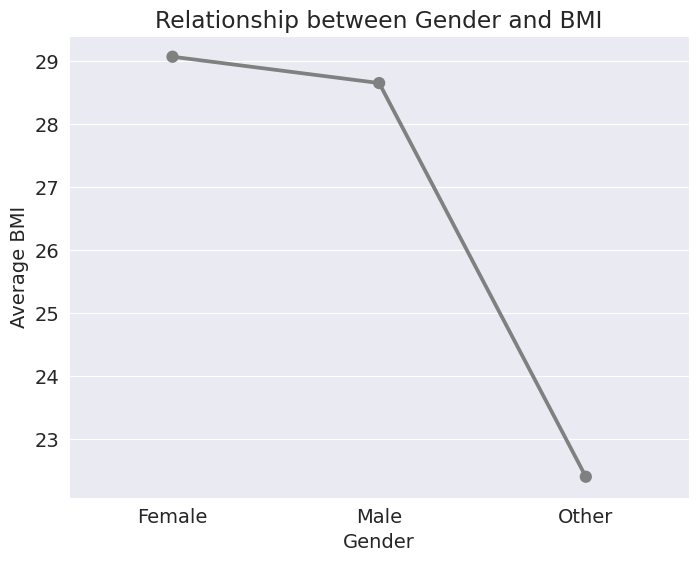

In [ ]:
gender_bmi_avg = df.groupby('gender')['bmi'].mean()
plt.figure(figsize=(8, 6))
sns.pointplot(x=gender_bmi_avg.index, y=gender_bmi_avg.values, color='gray', markers='o')
plt.xlabel('Gender')
plt.ylabel('Average BMI')
plt.title('Relationship between Gender and BMI')

# Show the plot
plt.show()

Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions

Here are some interesting questions related to the dataset which provide an insight into the correlation between various columns

## Q1: How many patients are underweight or overweight?

###Analysis
In our Dataset we have a column for bmi but it does not specify wheter the person is healthy or overweight. To find out the overweight and underweight patients we create a new column for bmi category where we assign '0' for underweight,'1' for healthy bmi and '2' for overweight



For this we use cut function  to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable.

For using cut function we create a list of conditions and thier corresponding Labels

These conditions and labels are used in the cut function to assign the value of '0' for underweight,'1' for normal bmi and '2' for Overweight.

In [ ]:
# Defining the conditions and corresponding labels for BMI categories
conditions = [
    (df['bmi'] < 18.5),
    (df['bmi'] >= 18.5) & (df['bmi'] < 25),
    (df['bmi'] >= 25)
]

labels = [0, 1, 2]

# Creating a new column "bmi_category" based on the conditions and labels
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, float('inf')], labels=labels, right=False)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category
2333,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0,1
1010,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0,2
2528,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0,1
805,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0,2
419,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,2
5083,72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0,1
2629,72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0,2
121,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1,2


###Visualization
Now we plot a bar graph of the different bmi categories value count

We use value_counts() to count the no. of patients in each bmi category

Then we plot the bar graph specifying different colors for different categories

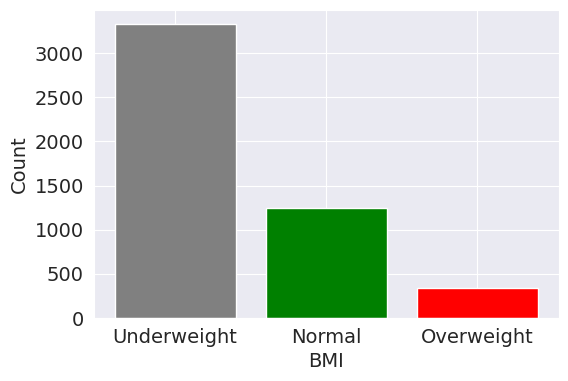

In [ ]:
bmi_counts = df['bmi_category'].value_counts()
bmi_labels = ['Underweight', 'Normal', 'Overweight']
# Creating the bar chart using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(bmi_labels, bmi_counts.values, color=['grey','green', 'red'])
plt.xlabel('BMI')
plt.ylabel('Count')
plt.xticks(bmi_labels)
plt.show()

###Explanation


* This Graph shows the number of patients who fall in each bmi category(underweight(0),Normal(1) and Overweight(3))

* Here we observe that most of the patients are overweight that is their bmi is above 25

* *  Overweight= 3000+
* * Healthy = 1250+
* * Underweight = 300+

## Q2: What is the difference in health condition of patients who suffered strokes and those who did not?

###Analysis
To answer this question we will create a categorical plot to differentiate between health conditions of people who did or did not suffer a stroke

We use pd.melt()  to join the desired columns together as values and the stroke column as the id on which the plot is distinguished upon

we use groupby() and count() to get the no. of patients for bmi, heart disease and hypertension seperately for patient who suffered a stroke and those who didn't

In [ ]:
df_cat = pd.melt(df, id_vars=['stroke'], value_vars=['hypertension', 'heart_disease', 'bmi_category'])

# Group and reformat the data to split it by 'stroke'. Show the counts of each feature.
df_cat["total"] = 1
df_cat = df_cat.groupby(["stroke", "variable", "value"], as_index =False).count()

###Visualization
We use seaborn library to plot the categorical graph

This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.



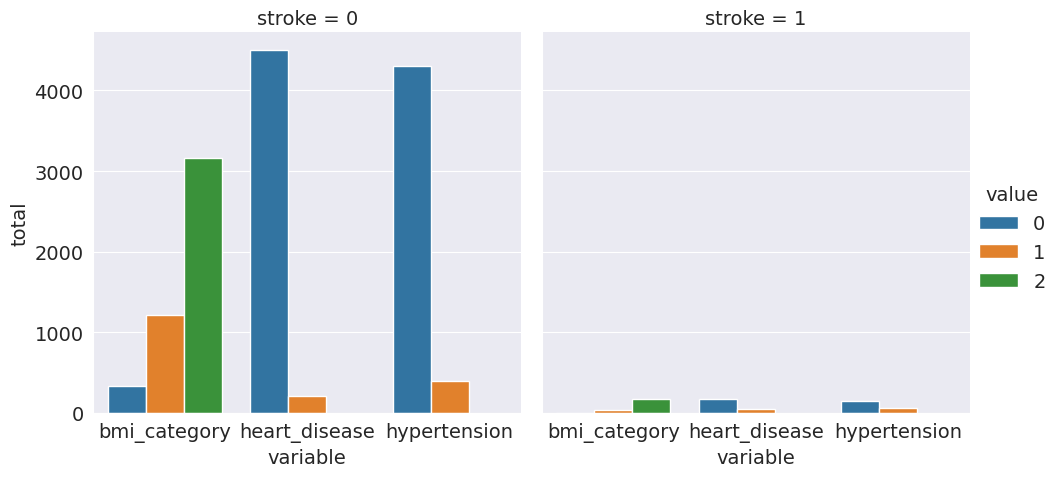

In [ ]:

fig = sns.catplot(x='variable', y='total', hue='value', col='stroke', data=df_cat, kind='bar').figure

###Explaination
* Here we observe that people who had a stroke are mostly overweight and have a higher chance of having heart disease or hypertension

* A very small amount of patient in this dataset actually suuffered with a stroke

* From the graph we can conclude that obesity is one of the prime cause for strokes.

## Q3: What is the relationship between having stroke and the smoking status of the patient?

###Analysis
To explore the relationship between the "smoke" and "stroke" columns in the dataset, you can use a stacked bar chart. A stacked bar chart will show the proportion of strokes within each smoking category, helping to visualize the relationship between the two variables.

But first we create a new smoke column with numeric values instead of categorical values

We use select() for which we create the conditions and labels list for the different smoking status.

In [ ]:
conditions = [
    (df['smoking_status'] == "Unknown"),
    (df['smoking_status'] == "never smoked"),
    (df['smoking_status'] == "formerly smoked"),
    (df['smoking_status'] == "smokes")
]

labels = [0, 1, 2,3]

# Create a new column "smoke" based on the conditions and labels
df['smoke'] = np.select(conditions, labels, default=-1)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,smoke
2333,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0,1,0
1010,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0,2,1
2528,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0,1,1
805,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0,2,0
419,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,2,3
5083,72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0,1,0
2629,72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0,2,2
121,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1,2,0


We create a new dataframe named df_stroke which only contains data of patients who have suffered a stroke

In [ ]:
df_stroke = df[df["stroke"] == 1]
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,smoke
169,210,Male,81.0,0,0,Yes,Self-employed,Rural,91.54,31.4,never smoked,1,2,1
199,491,Female,74.0,0,0,Yes,Self-employed,Urban,74.96,26.6,never smoked,1,2,1
35,712,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1,2,2
235,1210,Female,68.0,0,0,Yes,Private,Rural,211.06,39.3,Unknown,1,2,0
41,1261,Male,54.0,0,0,Yes,Private,Urban,71.22,28.5,never smoked,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,71673,Female,79.0,0,0,Yes,Private,Urban,110.85,24.1,formerly smoked,1,1,2
87,71796,Female,70.0,0,1,Yes,Private,Rural,59.35,32.3,formerly smoked,1,2,2
148,72081,Female,57.0,1,0,Yes,Govt_job,Rural,67.41,32.9,never smoked,1,2,1
67,72366,Male,76.0,0,0,Yes,Private,Urban,104.47,20.3,Unknown,1,1,0


###Visualization
We group the data by smoke and stroke.

We plot a bar graph giving us various smoking status and the no. of patients in each category

We name the x and y labels, give the title and the name for the ticks which are the various smoking status

<Figure size 600x400 with 0 Axes>

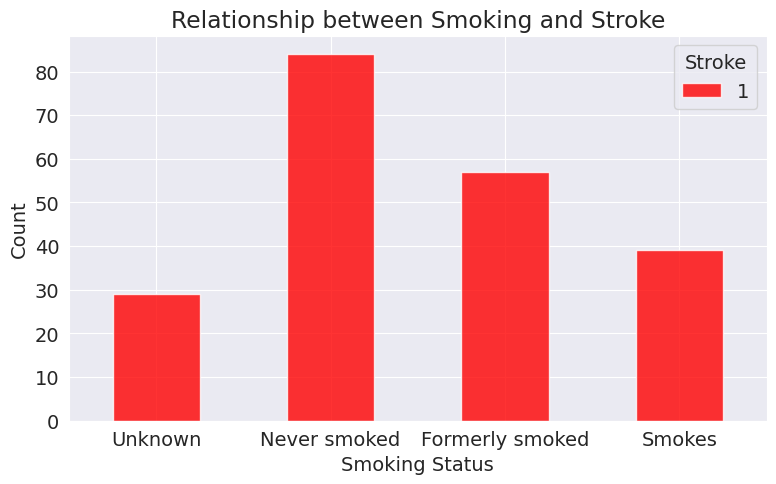

In [ ]:

# Group the data by 'smoke' and 'stroke' columns and calculate the count for each group
grouped_data = df_stroke.groupby(['smoke', 'stroke']).size().unstack()

# Create the stacked bar chart
plt.figure(figsize=(6, 4))
grouped_data.plot(kind='bar', color=['red'], alpha=0.8)

# Customize the plot
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Relationship between Smoking and Stroke')
plt.xticks(ticks=[0, 1,2,3], labels=['Unknown','Never smoked','Formerly smoked','Smokes'], rotation=0)
plt.legend(title='Stroke')

plt.show()

###Explaination
In this Graph we observe that out of 209 patients who suffered a stroke
* 80+ patients never smoked and still suffered a stroke
* 58 patients who suffered a stroke used to smoke
* 39 patients who suffered a stroke are smokers

## Q4:What amount of patients have normal glucose level

###Analysis
To determine whether the glucose level is normal(between 70 to 140) or not(above 140 ) we create another column for categorical value of glucose level

We again use cut() function and create conditions and labels for creating the new Diabetes column

In [ ]:
conditions = [
    (df['avg_glucose_level'] < 140),
    (df['avg_glucose_level'] >= 140)
]

labels = [0, 1]

# Create a new column "bmi_category" based on the conditions and labels
df['Diabetes'] = pd.cut(df['avg_glucose_level'], bins=[0, 140, float('inf')], labels=labels, right=False)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,smoke,Diabetes
2333,77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0,1,0,0
1010,84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0,2,1,0
2528,91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0,1,1,0
805,99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0,2,0,0
419,129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0,2,3,0
5083,72914,Female,19.0,0,0,No,Private,Urban,90.57,24.2,Unknown,0,1,0,0
2629,72915,Female,45.0,0,0,Yes,Private,Urban,172.33,45.3,formerly smoked,0,2,2,1
121,72918,Female,53.0,1,0,Yes,Private,Urban,62.55,30.3,Unknown,1,2,0,0


###Visualization
We count the no. of patients with and without diabetes

we plot the donut plot to see the no. of patients with or without diabetes based on their average glucose level

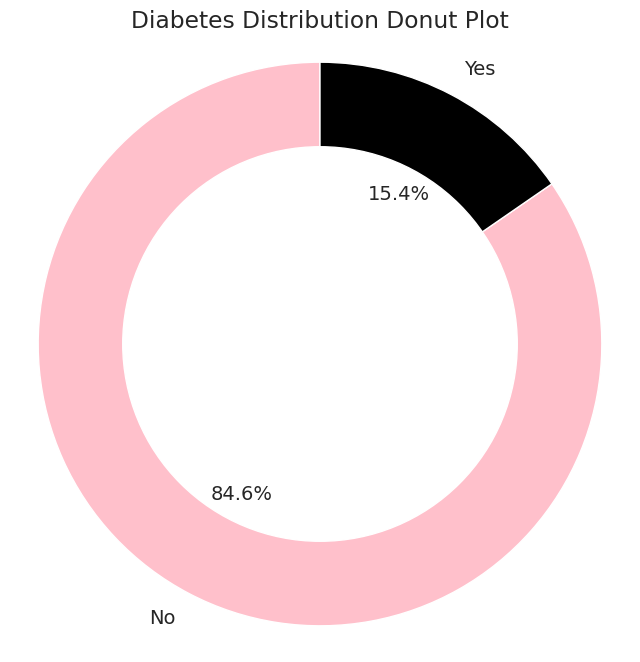

In [ ]:
glc_counts = df['Diabetes'].value_counts()
glc_labels = ['No','Yes']
plt.figure(figsize=(8, 8))

plt.pie(glc_counts.values, labels=glc_labels, colors=['pink', 'black'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.axis('equal')
plt.title('Diabetes Distribution Donut Plot')

plt.show()







###Explaination
* We observe that majority of patients have normal average glucose level
* Only 16% patients have average glucose level above 140

## Q5:What is the difference in various health problems for different genders

###Analysis
We use the df_stroke dataframe to only compare the patients who suffered a stroke

we use melt() function to create a new dataframe df_cat with 'gender' as id

The health problems are the value columns

In [ ]:
df_stroke = df[df["stroke"] == 1]
df_stroke
df_cat = pd.melt(df_stroke, id_vars=['gender'], value_vars=[ 'heart_disease','smoke','Diabetes','stroke'])

# Group and reformat the data to split it by 'stroke'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat["total"] = 1
df_cat = df_cat.groupby(["gender", "variable", "value"], as_index =False).count()


###Visualization
We plot a categorical plot where health problems for male and female are shown side by side for comparision

We use seaborn catplot() function for plotting this graph


Text(0.5, 1.02, 'Health Problems Comparison')

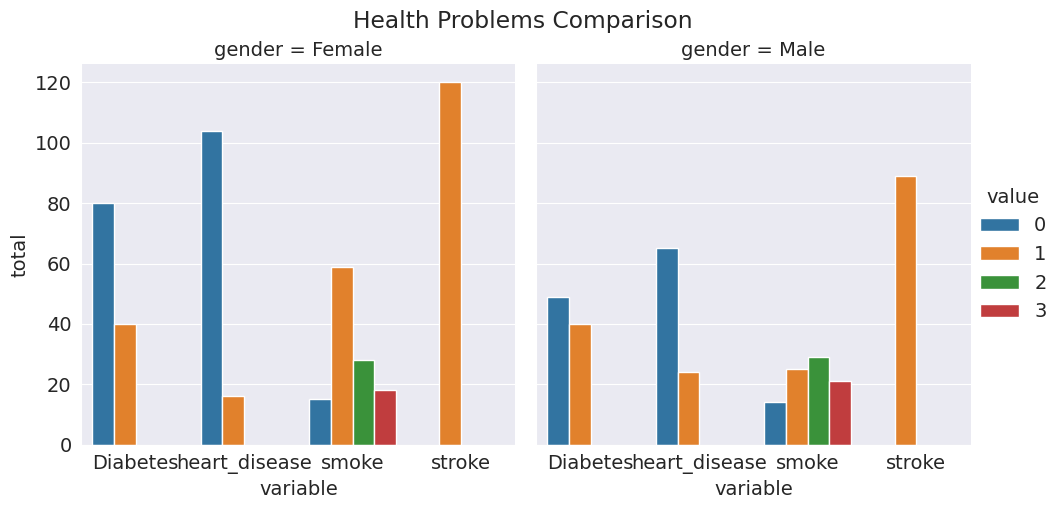

In [ ]:
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(x='variable', y='total', hue='value', col='gender', data=df_cat, kind='bar').figure
fig.suptitle('Health Problems Comparison', y=1.02)

###Explaination
* Both genders have equal number of Diabetes patients
* The male patients have more cases of heart disease than females
* More male patients are active smokers(the red bar)
* Greater amount of female patents have suffered a stroke than male patients

## Inferences and Conclusion



* Greater amount of female patents have suffered a stroke than male patients
* More male patients are active smokers
* Only 16% patients have average glucose level above 140
* Only 4% of the total patients in the dataset have suffered a stroke

* People with diabetes ,heart problems or smoking habit have high chance of strokes

* People who are overweight(bmi>25) have much higher chances of having heart problems and diabetes

## References and Future Work
###References-
Some interesting websites that have helped me in the analysis :

*   https://www.w3schools.com/python/matplotlib_pyplot.asp
*   https://www.w3schools.com/python/pandas/default.asp

*   https://www.kaggle.com/datasets
*   https://seaborn.pydata.org/tutorial/function_overview.html

###Future  Works-




* I plan to use this dataset to create a stroke predictor which will be
trained using this data and will be able to predict whether a patient has suffered a stroke or may be in the danger of stroke based on thier medical details


* I plan to further make more interesting analysis by merging this dataset with another dataset containing categorical data of diagnosis of different patients and determining the diseases by analysing the symptoms



In [ ]:
import jovian
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
